# Visualizing Filter Shape

DSP.jlの`freqz()`を使って、IIRフィルタの応答を見てみます。

In [54]:
using Plots, DSP

Robert Bristow-Johnsonの[Cookbook formulae for audio EQ biquad filter coefficients](http://www.musicdsp.org/files/Audio-EQ-Cookbook.txt)を参照して以下のピーク・フィルタを関数にしました。

In [55]:
function biquad_peak_rbj(fc, dBgain, Q=1/sqrt(2), samprate=44100)
    A = sqrt(10^(dBgain/20));
    w = 2 * pi * fc / samprate;
    s = sin(w);
    c = cos(w);
    a = s / (2 * Q/A);

    b0 =  1 + a*A;
    b1 = -2 * c;
    b2 =  1 - a*A;
    a0 =  1 + a/A;
    a1 = -2 * c;
    a2 =  1 - a/A;

    return Biquad(b0/a0, b1/a0, b2/a0, a1/a0, a2/a0);
end

biquad_peak_rbj (generic function with 3 methods)

中心周波数が1,000 Hz、ゲインが+12 dB、Q値が2.0、標本化周波数が44,100 Hzという指定で双二次フィルタを作ります。Biquad型は$b_0$、$b_1$、$b_2$、$a_1$、$a_2$の順で（$a_0$によって正規化した）フィルタ係数が入ります。

In [56]:
fs = 44100
fltr = biquad_peak_rbj(1000, +12, 2.0, fs)

Biquad{Float64}(1.1021959981391138, -1.9118664040428421, 0.8292407412393011, -1.9118664040428421, 0.9314367393784149)

20〜20,000 Hzまでを対数分割して、指定した周波数での応答を計算します。

In [57]:
f = 10 .^ range(log10(20), stop=log10(20000), length=256)
rsp = freqz(fltr, f, fs)

256-element Array{Complex{Float64},1}:
 1.0002973068843515 + 0.029769191278955026im
 1.0003138710658235 + 0.03058714825626161im 
 1.0003313588237948 + 0.03142760912474635im 
 1.0003498217367512 + 0.03229119548972548im 
 1.0003693142730998 + 0.03317854633556486im 
 1.0003898939541023 + 0.03409031852918317im 
 1.0004116215262318 + 0.03502718733961371im 
 1.0004345611433094 + 0.035989846974250346im
 1.0004587805591612 + 0.03697901113244367im 
 1.0004843513312534 + 0.03799541357714859im 
 1.0005113490360957 + 0.039039808725358296im
 1.0005398534970549 + 0.04011297225810338im 
 1.0005699490252336 + 0.041215701750841036im
 1.0006017246744203 + 0.04234881732510288im 
 1.0006352745106706 + 0.04351316232231731im 
 1.0006706978976327 + 0.044709604000787856im
   1.00070809979843 + 0.04593903425685057im 
 1.0007475910951784 + 0.047202370371310524im
 1.0007892889271484 + 0.04850055578231473im 
 1.0008333170488273 + 0.04983456088589505im 
  1.000879806208929 + 0.05120538386548932im 
 1.0009288945518

返値は複素数で、振幅応答も位相応答も含まれています。それぞれをdB単位と度で計算してプロットします。

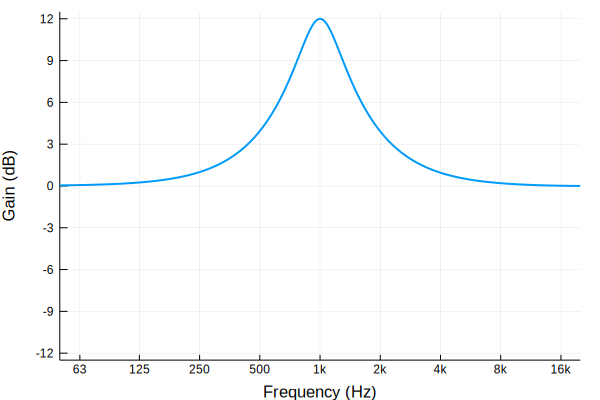

In [58]:
plot(f, 20*log10.(abs.(rsp)), linewidth=2,
    xlabel="Frequency (Hz)", ylabel="Gain (dB)",
    xscale=:log10, xlim=(50, 20000), ylim=(-12.5, +12.5),
    xticks=([63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000],
        ["63", "125", "250", "500", "1k", "2k", "4k", "8k", "16k"]),
    yticks=(-12:3:12),
    legend=false)

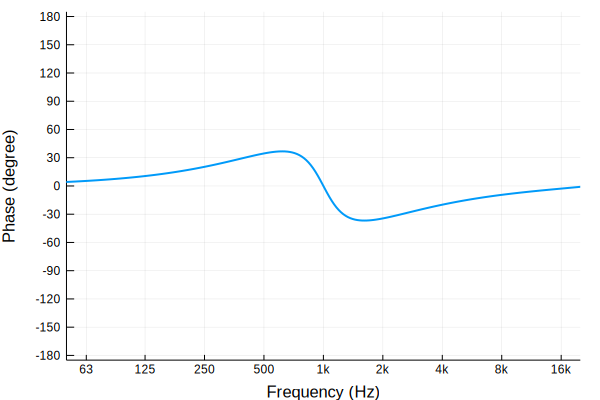

In [59]:
plot(f, angle.(rsp) * 180/pi, linewidth=2,
    xlabel="Frequency (Hz)", ylabel="Phase (degree)",
    xscale=:log10, xlim=(50, 20000), ylim=(-185,185),
    xticks=([63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000],
        ["63", "125", "250", "500", "1k", "2k", "4k", "8k", "16k"]),
    yticks=(-180:30:180),
    legend=false)